## Libraries <a class="anchor" id="zero-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

C:\Users\Laura\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data set cleaning <a class="anchor" id="first-bullet"></a>

In [3]:
initial_data = pd.read_json("MLA_100k.jsonlines",lines=True)

In [4]:
initial_data.head()


,accepts_mercadopago,attributes,automatic_relist,available_quantity,base_price,buying_mode,catalog_product_id,category_id,condition,coverage_areas,...,status,stop_time,sub_status,subtitle,tags,thumbnail,title,variations,video_id,warranty
0,True,[],False,1,80.0,buy_it_now,NaN,MLA126406,new,[],...,active,2015-11-04 20:42:53,[],NaN,[dragged_bids_and_visits],http://mla-s1-p.mlstatic.com/5386-MLA435206787...,Auriculares Samsung Originales Manos Libres Ca...,[],None,None
1,True,[],False,1,2650.0,buy_it_now,NaN,MLA10267,used,[],...,active,2015-11-25 18:08:30,[],NaN,[],http://mla-s1-p.mlstatic.com/23223-MLA20245018...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,[],None,NUESTRA REPUTACION
2,True,[],False,1,60.0,buy_it_now,NaN,MLA1227,used,[],...,active,2015-11-08 23:57:07,[],NaN,[dragged_bids_and_visits],http://mla-s1-p.mlstatic.com/22076-MLA20223367...,"Antigua Revista Billiken, N° 1826, Año 1954",[],None,None
3,True,[],False,1,580.0,buy_it_now,NaN,MLA86345,new,[],...,active,2015-12-04 01:13:16,[],NaN,[],http://mla-s2-p.mlstatic.com/183901-MLA2043288...,Alarma Guardtex Gx412 Seguridad Para El Automo...,[],None,None
4,True,[],False,1,30.0,buy_it_now,NaN,MLA41287,used,[],...,active,2015-10-23 22:07:20,[],NaN,[dragged_bids_and_visits],http://mla-s2-p.mlstatic.com/13595-MLA13041807...,Serenata - Jennifer Blake,[],None,MI REPUTACION.


In [5]:
initial_data['condition']=initial_data['condition'].map({"new":1,"used":0})
X = initial_data[['available_quantity', 'base_price']]

y = initial_data['condition']

### Class distribution <a class="anchor" id="first-bullet"></a>

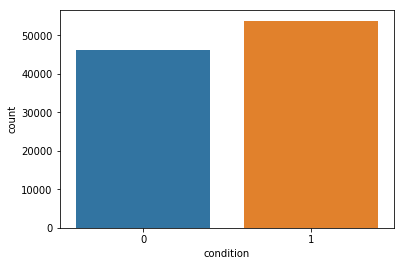

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(initial_data['condition'],label="Sum")

plt.show()

## Testing algorithms <a class="anchor" id="second-bullet"></a>

### Withouth reduction <a class="anchor" id="without_red"></a>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(66000, 34000, 66000, 34000)

#### CLASSIFIERS

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from Classifiers import Clas_LogisticRegression 
LR_fit_time, LR_score_time, LR_accuracy, LR_precision, LR_recall, LR_f1, LR_roc= Clas_LogisticRegression(X_train, y_train)

In [12]:
from Classifiers import Clas_DecisionTree 
dtree_fit_time, dtree_score_time, dtree_accuracy, dtree_precision, dtree_recall, dtree_f1, dtree_roc= Clas_DecisionTree(X_train, y_train)

In [13]:
from Classifiers import Clas_LDA
LDA_fit_time, LDA_score_time, LDA_accuracy, LDA_precision, LDA_recall, LDA_f1, LDA_roc = Clas_LDA(X_train, y_train)

In [14]:
from Classifiers import Clas_QDA
QDA_fit_time, QDA_score_time, QDA_accuracy, QDA_precision, QDA_recall, QDA_f1, QDA_roc = Clas_QDA(X_train, y_train)

In [15]:
from Classifiers import Clas_RFOREST
forest_fit_time, forest_score_time, forest_accuracy, forest_precision, forest_recall, forest_f1, forest_roc  = Clas_RFOREST(X_train, y_train)

In [16]:
from Classifiers import Clas_KNN
KNN_fit_time, KNN_score_time, KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc = Clas_KNN(X_train, y_train)

In [17]:
from Classifiers import Clas_GNB
bayes_fit_time, bayes_score_time, bayes_accuracy, bayes_precision, bayes_recall, bayes_f1, bayes_roc = Clas_GNB(X_train, y_train)

### Comparacion

In [18]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time,  LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy,  LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1,  LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
4,Random Forest,0.454023,0.034376,0.781287,0.790565,0.787790,0.780765,0.851792
1,Decision Tree,0.078439,0.009567,0.778439,0.789723,0.785603,0.777652,0.842532
5,K-Nearest Neighbors,0.620392,0.130672,0.758486,0.759262,0.760402,0.758746,0.820673
0,Logistic Regression,0.149026,0.003124,0.539136,0.362277,0.500554,0.378671,0.681139
2,Linear Discriminant Analysis,0.018190,0.005768,0.538667,0.281834,0.500002,0.377187,0.693879
3,Quadratic Discriminant Analysis,0.011961,0.007380,0.483484,0.723347,0.516951,0.335044,0.684759
6,Bayes,0.012274,0.007149,0.477985,0.720270,0.511849,0.323583,0.684423


## Voting classifier <a class="anchor" id="voting"></a>

In [21]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [23]:
for model in models:
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)

#### Hard

In [24]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

#### Soft

In [25]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

#### Comparicion

In [27]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Ensembling_soft,0.774735,0.800023,0.775051,0.787339,0.849972
0,Ensebling_hard,0.549147,0.544454,0.992237,0.703105,not applicable


# Linear SVC + SelectFromModel <a class="anchor" id="linear_model"></a>


In [33]:
X.shape

(100000, 2)

In [32]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_svc = model.transform(X)
X_svc.shape #reduction from 30 to 10 features

(100000, 1)